In [8]:
import pandas as pd
import datetime as dt
from pathlib import Path

In [2]:
###
# Carregamento dos dados de biometria obtidos pelo wearable
###
df = pd.DataFrame()
jsons = []
pathlist = Path("data/com.samsung.shealth.stress/").glob('**/*.json')
for path in pathlist:
    path_in_str = str(path)
    tmp_df = pd.read_json(path)
    jsons.append(tmp_df)

df = pd.concat(jsons)



In [3]:
df['score'] = pd.to_numeric(df['score'])
df['hrv'] = df['score'].apply(lambda x: 100 - x)
df = df.sort_values(by=['end_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [4]:
dfplot = df[df['end_time'] > dt.datetime.now() - dt.timedelta(days=30)]


In [5]:
dfplot['normalized'] = dfplot['end_time'].dt.normalize()
# dfplot = dfplot[['normalized', 'score']].groupby('normalized').mean().reset_index()
dfplot['normalized'] = dfplot['normalized'].dt.strftime('%m-%d')

/tmp/ipykernel_21803/3229299251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfplot['normalized'] = dfplot['end_time'].dt.normalize()
/tmp/ipykernel_21803/3229299251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfplot['normalized'] = dfplot['normalized'].dt.strftime('%m-%d')


In [6]:
import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# %matplotlib inline

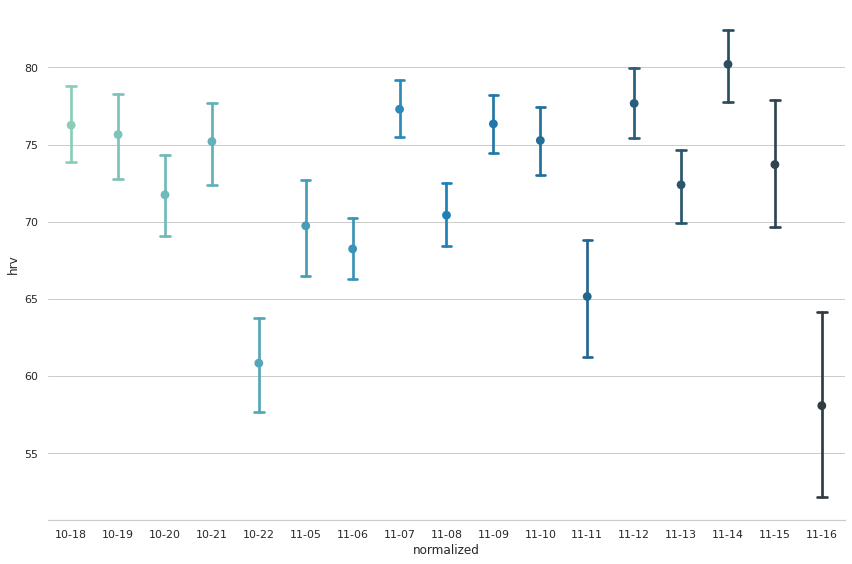

In [7]:
sns.set_theme(style="whitegrid")
g = sns.catplot(x="normalized", y="hrv", capsize=.2, palette="YlGnBu_d", height=8, aspect=1.5,
                kind="point", data=dfplot)
g.despine(left=True)
# sns.relplot(data=dfplot, x='score', y='normalized', kind='line')
